In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2017.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.544856
0    0.455144
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.532125
0    0.467875
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
608,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
609,ATL,34.469136,4.518519,9.055556,4.358025,4.303272,2.925926,7.308642,38.370370,0.258290,...,11.444444,13.635802,5.944444,0.006173,49.450617,1.329193,0.403727,-0.020815,-0.461111,1
610,LAD,33.382716,4.753086,8.314815,4.506173,4.730000,4.006173,8.518519,38.216049,0.245833,...,12.037037,15.154321,6.950617,0.012346,48.339506,1.471698,0.459119,-0.030247,-0.472840,1
611,PIT,33.691358,4.123457,8.216049,3.919753,3.825679,3.203704,7.487654,37.876543,0.238704,...,11.882716,14.895062,6.796296,0.024691,52.864198,1.320513,0.365385,0.052444,0.329630,0
612,OAK,33.728395,4.561728,8.296296,4.370370,4.483642,3.487654,9.203704,37.814815,0.240173,...,10.783951,14.654321,6.376543,0.018519,48.919753,1.770186,0.639752,0.014864,0.027778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,BAL,34.876543,4.586420,9.067901,4.401235,4.319136,2.419753,8.716049,37.901235,0.254074,...,11.456790,14.425926,6.388889,0.006173,50.388889,1.679245,0.433962,0.032451,0.349383,0
1211,CHW,34.030864,4.358025,8.716049,4.135802,4.071111,2.475309,8.623457,37.401235,0.249253,...,12.438272,15.148148,6.987654,0.006173,48.746914,1.472050,0.378882,0.009642,-0.084568,0
1212,TOR,33.944444,4.277778,8.148148,4.080247,4.017716,3.345679,8.191358,37.987654,0.236481,...,10.783951,14.654321,6.376543,0.018519,48.919753,1.770186,0.639752,0.014864,0.027778,0
1213,SDP,33.061728,3.728395,7.722222,3.555556,3.601728,2.839506,9.253086,36.753086,0.229593,...,10.746914,13.314815,6.098765,0.000000,50.000000,1.333333,0.444444,-0.041759,-0.278395,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1,ARI,34.104938,5.012346,8.672840,4.790123,4.939444,3.567901,8.987654,38.419753,0.249259,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
2,STL,33.765432,4.697531,8.654321,4.493827,4.486728,3.660494,8.320988,38.388889,0.252457,...,11.839506,13.160494,6.592593,0.006173,49.012346,1.453416,0.472050,-0.011130,-0.415432,1
3,TEX,33.518519,4.932099,8.185185,4.666667,4.781358,3.358025,9.216049,37.790123,0.240247,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,0
4,MIL,33.691358,4.444444,8.351852,4.216049,4.273951,3.271605,9.697531,37.703704,0.243426,...,13.265432,13.413580,6.629630,0.018519,46.876543,1.465839,0.472050,0.015272,-0.198765,0


In [13]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
608,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
609,ATL,34.469136,4.518519,9.055556,4.358025,4.303272,2.925926,7.308642,38.370370,0.258290,...,11.444444,13.635802,5.944444,0.006173,49.450617,1.329193,0.403727,-0.020815,-0.461111,1
610,LAD,33.382716,4.753086,8.314815,4.506173,4.730000,4.006173,8.518519,38.216049,0.245833,...,12.037037,15.154321,6.950617,0.012346,48.339506,1.471698,0.459119,-0.030247,-0.472840,1
611,PIT,33.691358,4.123457,8.216049,3.919753,3.825679,3.203704,7.487654,37.876543,0.238704,...,11.882716,14.895062,6.796296,0.024691,52.864198,1.320513,0.365385,0.052444,0.329630,0
612,OAK,33.728395,4.561728,8.296296,4.370370,4.483642,3.487654,9.203704,37.814815,0.240173,...,10.783951,14.654321,6.376543,0.018519,48.919753,1.770186,0.639752,0.014864,0.027778,1


In [14]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [15]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [16]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [17]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [18]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [19]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 90
criterion: entropy
Mean Cross-Val Score: 0.508641975308642
Train Mean Accuracy: 0.7218106995884773
Test Mean Accuracy: 0.7182866556836903
Recall Score: 0.7678018575851393
Precision Score: 0.7209302325581395
F1 score: 0.7436281859070464


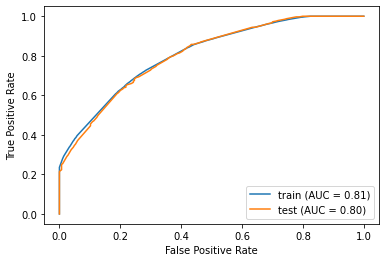

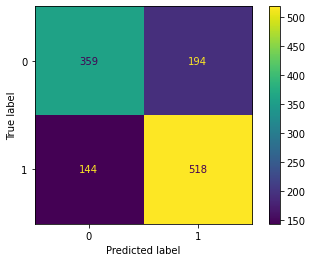

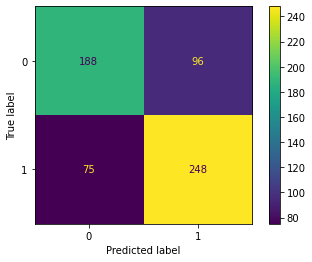

In [20]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [21]:
new_acc(probabilities)

(0.7756410256410257, 363)

### PCA

In [22]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 100
criterion: gini
Mean Cross-Val Score: 0.5259259259259259
Train Mean Accuracy: 0.7218106995884773
Test Mean Accuracy: 0.7166392092257001
Recall Score: 0.7616099071207431
Precision Score: 0.7214076246334311
F1 score: 0.7409638554216867


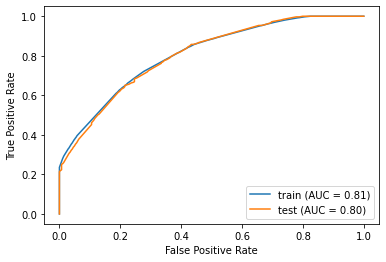

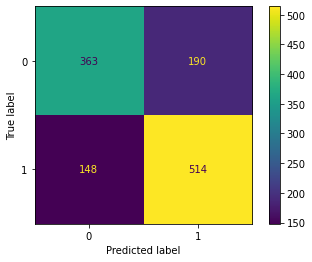

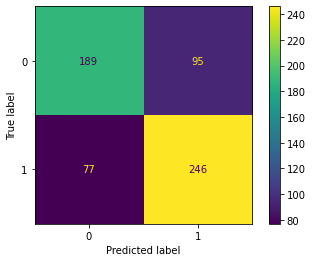

In [23]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [24]:
new_acc(probabilities)

(0.7758985200845666, 367)